In [11]:
from datos import obtenerCapacitancia, obtenerFrecuencia, obtenerInductancia, obtenerResistencias, obtenerVoltaje
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches




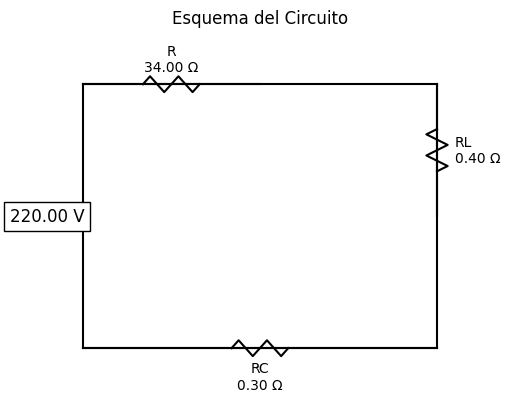

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots()
voltaje=220
resistencias=[4,5,8,7,10]
serie=True
rlc=True
XL=0.4
XC=0.3

componentes = resistencias
if rlc:
    resistenciaTotal = suma_Resistencia(resistencias, serie)
    componentes = [resistenciaTotal, XL, XC]
    nombres = ['R', 'RL', 'RC']
else:
    nombres = ['R' + str(i + 1) for i in range(len(resistencias))]

if serie:
    num_componentes = len(componentes)
    tercio = num_componentes // 3
    resto = num_componentes % 3

    # Línea superior
    for i, (comp, nombre) in enumerate(zip(componentes[:tercio], nombres[:tercio])):
        ax.plot([i / (tercio + 1), (i + 1) / (tercio + 1)], [1, 1], 'k-')
        ax.text((i + 0.5) / (tercio + 1), 1.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center')
        #Rayita
        am=((i + 0.5) / (tercio + 1))
        x = np.array([am-0.08,am-0.06,am-0.04,am-0.02,am,am+0.02,am+0.04,am+0.06,am+0.08])
        y = np.array([1, 1.03,1,0.97,1, 1.03,1,0.97,1])
        ax.plot(x, y, 'k-')  # Alambre

    # Línea derecha
    for i, (comp, nombre) in enumerate(zip(componentes[tercio:2*tercio], nombres[tercio:2*tercio])):
        ax.plot([1, 1], [1 - (i + 1) / (tercio + 1), 1 - i / (tercio + 1)], 'k-')
        ax.text(1.05, 1 - (i + 0.5) / (tercio + 1), nombre + '\n' + f'{comp:.2f} Ω', va='center')
        #alambre
        am=(1 - (i+0.5) / (tercio + 1))
        x = np.array([1, 1.03,1,0.97,1, 1.03,1,0.97,1])
        y= np.array([am-0.08,am-0.06,am-0.04,am-0.02,am,am+0.02,am+0.04,am+0.06,am+0.08])
        ax.plot(x, y, 'k-') 



    # Línea inferior
    for i, (comp, nombre) in enumerate(zip(componentes[2*tercio:], nombres[2*tercio:])):
        ax.plot([1 - i / (tercio + resto), 1 - (i + 1) / (tercio + resto)], [0, 0], 'k-')
        ax.text(1 - (i + 0.5) / (tercio + resto), -0.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='top')
        #alambre
        am=((1 - (i+0.5) / (tercio + resto)))
        x= np.array([am-0.08,am-0.06,am-0.04,am-0.02,am,am+0.02,am+0.04,am+0.06,am+0.08])
        y = np.array([0,0.03,0,-0.03,0, 0.03,0,-0.03,0])
        ax.plot(x, y, 'k-')  # Alambre
        
        
        
        
        
else:  # Paralelo
    num_componentes = len(componentes)
    for i, (comp, nombre) in enumerate(zip(componentes, nombres)):
        y_pos = 1 - i / (num_componentes - 1) if num_componentes > 1 else 0.5
        ax.plot([0, 1], [y_pos, y_pos], 'k-')
        ax.text(0.5, y_pos+0.08, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='center')
        #alambre
        y= np.array([y_pos,y_pos+0.03,y_pos,y_pos-0.03,y_pos,y_pos+0.03,y_pos,y_pos-0.03,y_pos])
        x = np.array([0.42,0.44,0.46,0.48,0.5, 0.52,0.54,0.56,0.58])
        ax.plot(x, y, 'k-')
        
        
        
        
ax.plot([0, 0], [0, 1], 'k-')  # Línea izquierda
ax.plot([0, 1], [1, 1], 'k-')  # Línea superior
ax.plot([1, 1], [1, 0], 'k-')  # Línea derecha
ax.plot([1, 0], [0, 0], 'k-')  # Línea inferior

ax.text(-0.1, 0.5, f'{voltaje:.2f} V', va='center', ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.axis('off')
plt.title('Esquema del Circuito')
plt.show()
